#### imports

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ
from qiskit.tools import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

#### create quantum circuit

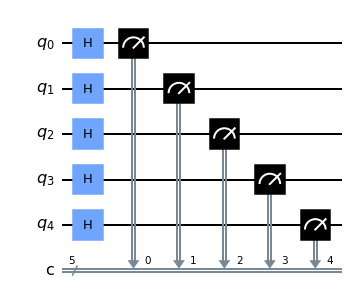

In [2]:
# Get # of qubits for quantum circuit
def get_qubits():
    n = int(input('Chose how many qubits to include in the quantum circuit (limit: 5) -> '))

    if n > 6:
        get_qubits()
    else:
        return n

n_qubits = get_qubits()


qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.h(i)

qc.measure(range(n_qubits), range(n_qubits))

qobj = assemble(qc)

qc.draw(output='mpl')

#### run circuit on quantum computer

Running on ibmq_athens
Job Status: job has successfully run
state -> 01100


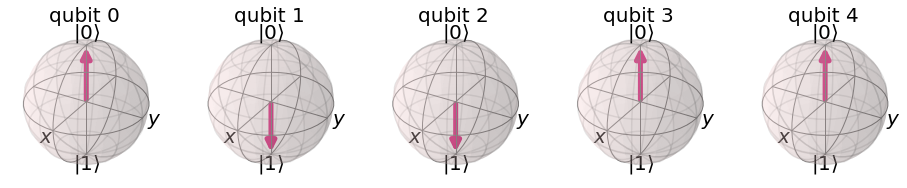

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

# Get least busy computer.
qcomp = provider.get_backend('ibmq_athens')
print('Running on', qcomp)

# NOTE: To choose the best backend, check: https://quantum-computing.ibm.com/services?systems=yours

# Run circuit.  
job = execute(qc, backend=qcomp, memory=True)
job_monitor(job)

result = job.result()

state = result.get_memory(qc)[0]

print('state ->', state)

statevectors = [
    [1, 0],
    [0, 1]
]

for i, qubit_state in enumerate(state):
    qc.initialize(statevectors[int(qubit_state)], i)

qc.draw()

qobj = assemble(qc)

# # NOTE: The reason why we re-initialize the state as the result of the simulation
# #       is so that we can represent that state on a bloch sphere.

simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector()

plot_bloch_multivector(statevector)

#### convert state to decimal

In [4]:
def convert(state):

    decimal, exponent  = (0, 1)

    for bit in state:
        decimal += int(bit) * 2 ** -exponent
        exponent += 1
    
    # NOTE: In the above for loop, we are converting the state to a number between 0 and 1.

    return decimal

print("random number", convert(state))

random number 0.375
